In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
df_cleaned = df.drop(columns=columns_to_drop)

In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

### Replacing Missing Values in the 'race' Column

In this step, we replace any occurrences of `'?'` in the `race` column with `'Other'`. This helps standardize the data and handle missing or unknown values.

In [7]:
df_cleaned['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [8]:
# Replace '?' with 'Other' in the 'race' column
df_cleaned['race'] = df_cleaned['race'].replace('?', 'Other')

# Verify the updated value counts
print(df_cleaned['race'].value_counts())


Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64


### Creating the 'age2' Column Based on Conditions

In this step, we create a new column `age2` by grouping the existing `age` column into broader ranges. This simplifies age-related analysis.

#### Logic:
- Default value for `age2` is set to `'Unknown'`.
- Age ranges are grouped as follows:
  - `[0-10)`, `[10-20)`, `[20-30)`, `[30-40)` → `'0-40'`
  - `[40-50)`, `[50-60)`, `[60-70)` → `'40-70'`
  - `[70-80)`, `[80-90)`, `[90-100)` → `'70-100'

In [9]:
df_cleaned['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [10]:
# Create the 'age2' column directly based on conditions
df_cleaned['age2'] = 'Unknown'  # Default value

df_cleaned.loc[df_cleaned['age'].isin(['[0-10)', '[10-20)', '[20-30)', '[30-40)']), 'age2'] = '0-40'
df_cleaned.loc[df_cleaned['age'].isin(['[40-50)', '[50-60)', '[60-70)']), 'age2'] = '40-70'
df_cleaned.loc[df_cleaned['age'].isin(['[70-80)', '[80-90)', '[90-100)']), 'age2'] = '70-100'

# Verify the resulting DataFrame
print(df_cleaned['age2'].value_counts())


40-70     49424
70-100    46058
0-40       6284
Name: age2, dtype: int64


### Applying Logarithmic Transformation to Address Skewness

The `number_outpatient` and `number_emergency` columns were highly skewed. To reduce skewness and normalize the distribution, we applied a common logarithm transformation (log base 10). A small constant `1` is added to avoid taking the logarithm of zero.


In [11]:
import numpy as np

# Replace values in the columns with their common logarithm (log base 10)
df_cleaned['number_outpatient1'] = df_cleaned['number_outpatient'].apply(lambda x: np.log10(x + 1))
df_cleaned['number_emergency1'] = df_cleaned['number_emergency'].apply(lambda x: np.log10(x + 1))

# Verify the updated columns
print(df_cleaned[['number_outpatient1', 'number_emergency1']].head())


   number_outpatient1  number_emergency1
0            0.000000                0.0
1            0.000000                0.0
2            0.477121                0.0
3            0.000000                0.0
4            0.000000                0.0


In [12]:
df_cleaned['number_outpatient1'].value_counts()

0.000000    85027
0.301030     8547
0.477121     3594
0.602060     2042
0.698970     1099
0.778151      533
0.845098      303
0.903090      155
0.954243       98
1.000000       83
1.041393       57
1.079181       42
1.146128       31
1.113943       30
1.176091       28
1.204120       20
1.230449       15
1.255273        8
1.342423        7
1.322219        7
1.278754        5
1.361728        5
1.301030        3
1.447158        3
1.397940        3
1.431364        2
1.380211        2
1.414973        2
1.531479        2
1.556303        2
1.568202        2
1.477121        2
1.544068        1
1.602060        1
1.633468        1
1.462398        1
1.579784        1
1.591065        1
1.612784        1
Name: number_outpatient1, dtype: int64

In [13]:
df_cleaned['number_emergency1'].value_counts()

0.000000    90383
0.301030     7677
0.477121     2042
0.602060      725
0.698970      374
0.778151      192
0.845098       94
0.903090       73
0.954243       50
1.041393       34
1.000000       33
1.079181       23
1.146128       12
1.113943       10
1.361728        6
1.230449        5
1.278754        5
1.301030        4
1.322219        4
1.204120        3
1.176091        3
1.414973        2
1.342423        2
1.462398        1
1.633468        1
1.672098        1
1.886491        1
1.579784        1
1.812913        1
1.806180        1
1.740363        1
1.397940        1
1.477121        1
Name: number_emergency1, dtype: int64

### Replacing Values in the 'readmitted' Column

In this step, we simplify the `readmitted` column by replacing specific values:

- `<30` and `>30` are replaced with `'YES'`, indicating a readmission occurred.
- Other values remain unchanged.

In [14]:
# Replace '<30' and '>30' with 'YES' in the column
df_cleaned['readmitted'] = df_cleaned['readmitted'].replace({'<30': 'YES', '>30': 'YES'})

# Verify the updated value counts
print(df_cleaned['readmitted'].value_counts())

NO     54864
YES    46902
Name: readmitted, dtype: int64


C:\Users\ashik.e\AppData\Local\Temp\ipykernel_10464\883898931.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()  # Calculates pairwise correlations for numeric columns


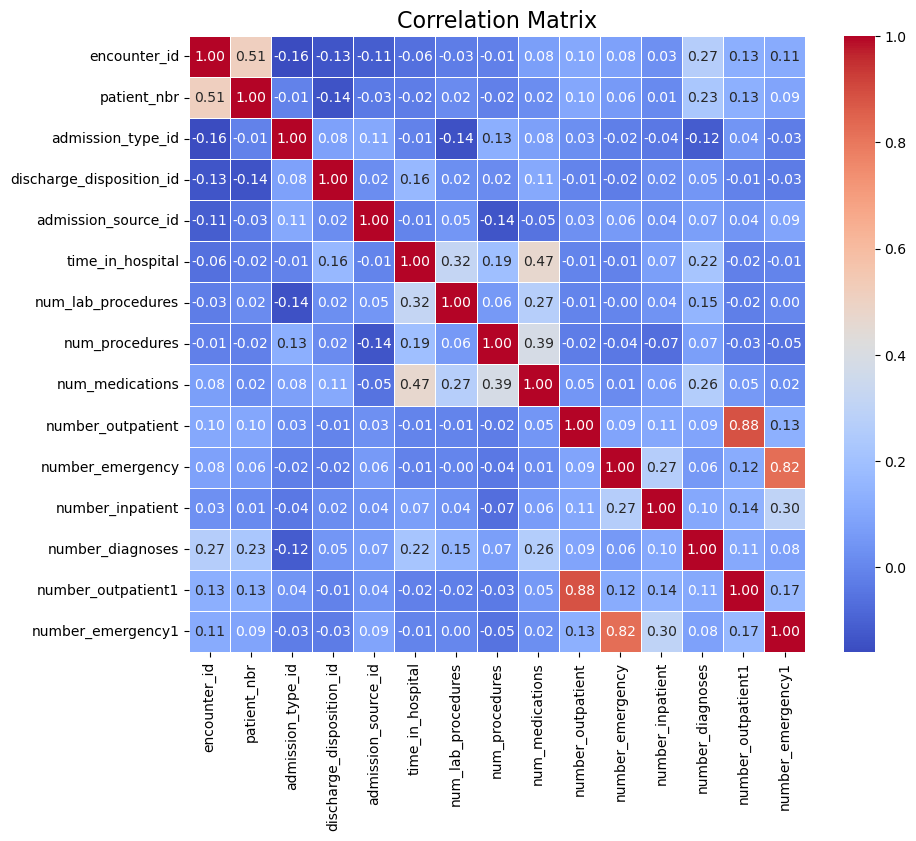

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute the correlation matrix
correlation_matrix = df_cleaned.corr()  # Calculates pairwise correlations for numeric columns

# 2. Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display correlation coefficients in cells
    cmap='coolwarm',       # Color map for visualization (red-blue gradient)
    fmt=".2f",             # Format the correlation values to 2 decimal places
    linewidths=0.5,        # Add lines between cells for better distinction
    square=True            # Makes each cell a square
)

# 3. Add a title to the plot
plt.title('Correlation Matrix', fontsize=16)
plt.show()


### Standardizing Values in the 'admission_type_id' Column

To simplify the analysis, we group specific values in the `admission_type_id` column into common categories:

1. **Emergency (1)** and **Urgent (2)** → replaced with `10`.
2. **Not Available (5)**, **NULL (6)**, and **Not Mapped (8)** → replaced with `20`.

### Check IDS Mapping Excel file for the exact mapping...

In [16]:
df_cleaned['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [17]:
# Replace 'Emergency' (1) and 'Urgent' (2) with a common value (e.g., 10)
# Replace 'Not Available' (5), NULL (6), and 'Not Mapped' (8) with a common value (e.g., 20)
df_cleaned['grouped_admission_type_id'] = df_cleaned['admission_type_id'].replace({1: 10, 2: 10, 3: 3, 4: 4, 5: 20, 6: 20, 7: 7, 8: 20})

# Output the updated DataFrame
df_cleaned['grouped_admission_type_id'].value_counts()

10    72470
3     18869
20    10396
7        21
4        10
Name: grouped_admission_type_id, dtype: int64

### Mapping 'discharge_disposition_id' to Grouped Categories  

In this step, we group the `discharge_disposition_id` values based on the following mapping:  

| **Original Value** | **Description**                                                      | **Mapped Value** |
|--------------------|----------------------------------------------------------------------|------------------|
| 1                  | Discharged to home                                                   | 1                |
| 2                  | Discharged/transferred to another short term hospital                | 2                |
| 3                  | Discharged/transferred to SNF                                        | 2                |
| 4                  | Discharged/transferred to ICF                                        | 2                |
| 5                  | Discharged/transferred to another type of inpatient care institution | 2                |
| 6                  | Discharged/transferred to home with home health service              | 1                |
| 7                  | Left AMA                                                             | 7                |
| 8                  | Discharged/transferred to home under care of Home IV provider        | 1                |
| 9                  | Admitted as an inpatient to this hospital                            | 6                |
| 10                 | Neonate discharged to another hospital for neonatal aftercare        | 2                |
| 11                 | Expired                                                              | 3                |
| 12                 | Still patient or expected to return for outpatient services          | 4                |
| 13                 | Hospice / home                                                       | 5                |
| 14                 | Hospice / medical facility                                           | 5                |
| 15                 | Discharged/transferred within this institution to Medicare approved swing bed | 2        |
| 16                 | Discharged/transferred/referred another institution for outpatient services | 2        |
| 17                 | Discharged/transferred/referred to this institution for outpatient services | 2        |

The resulting column `grouped_discharge_disposition` contains the grouped values as specified.  

### Check IDS Mapping Excel file for the exact mapping...

In [18]:
df_cleaned['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [19]:
# Mapping the 'discharge_disposition_id' based on the groupings
df_cleaned['grouped_discharge_disposition'] = df_cleaned['discharge_disposition_id'].replace({
    1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 1, 7: 7, 8: 1, 9: 6, 10: 2, 
    11: 3, 12: 4, 13: 5, 14: 5, 15: 2, 16: 2, 17: 2, 18: 7, 
    19: 3, 20: 3, 21: 3, 22: 2, 23: 2, 24: 2, 25: 7, 26: 7, 30: 2, 
    27: 2, 28: 2, 29: 2
})

In [20]:
df_cleaned['grouped_discharge_disposition'].value_counts()

1    73244
2    20772
7     5303
3     1652
5      771
6       21
4        3
Name: grouped_discharge_disposition, dtype: int64

### Mapping 'admission_source_id' to Grouped Categories  

In this step, we group the `admission_source_id` values into broader categories based on the following mapping:  

| **Original Value** | **Description**                                                      | **Mapped Value** |
|--------------------|----------------------------------------------------------------------|------------------|
| 1                  | Physician Referral                                                  | 1                |
| 2                  | Clinic Referral                                                     | 1                |
| 3                  | HMO Referral                                                        | 1                |
| 4                  | Transfer from a hospital                                            | 2                |
| 5                  | Transfer from a Skilled Nursing Facility (SNF)                      | 2                |
| 6                  | Transfer from another health care facility                          | 2                |
| 7                  | Emergency Room                                                      | 3                |
| 8                  | Court/Law Enforcement                                               | 6                |
| 9                  | Not Available                                                       | 5                |
| 10                 | Transfer from critical access hospital                              | 2                |
| 11                 | Normal Delivery                                                     | 4                |
| 12                 | Premature Delivery                                                  | 4                |
| 13                 | Sick Baby                                                           | 4                |
| 14                 | Extramural Birth                                                    | 4                |
| 15                 | Not Available                                                       | 5                |
| 17                 | NULL                                                                | 5                |
| 18                 | Transfer From Another Home Health Agency                            | 2                |
| 19                 | Readmission to Same Home Health Agency                              | 2                |
| 20                 | Not Mapped                                                          | 5                |
| 21                 | Unknown/Invalid                                                     | 5                |
| 22                 | Transfer from hospital inpt/same fac reslt in a sep claim           | 2                |
| 23                 | Born inside this hospital                                           | 7                |
| 24                 | Born outside this hospital                                          | 7                |
| 25                 | Transfer from Ambulatory Surgery Center                             | 2                |
| 26                 | Transfer from Hospice                                               | 2                |

The resulting column `grouped_admission_source` contains the grouped values as specified.  

### Check IDS Mapping Excel file for the exact mapping...

In [23]:
df_cleaned['admission_source_id'].value_counts()

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [21]:
# Mapping the 'admission_source_id' based on the groupings
df_cleaned['grouped_admission_source'] = df_cleaned['admission_source_id'].replace({
    1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 6, 9: 5, 10: 2, 
    11: 4, 12: 4, 13: 4, 14: 4, 15: 5, 17: 5, 18: 2, 19: 2, 20: 5, 
    21: 5, 22: 2, 23: 7, 24: 7, 25: 2, 26: 2
})

In [22]:
df_cleaned['grouped_admission_source'].value_counts()

3    57494
1    30856
5     7067
2     6328
6       16
4        5
Name: grouped_admission_source, dtype: int64

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   encounter_id                   101766 non-null  int64  
 1   patient_nbr                    101766 non-null  int64  
 2   race                           101766 non-null  object 
 3   gender                         101766 non-null  object 
 4   age                            101766 non-null  object 
 5   admission_type_id              101766 non-null  int64  
 6   discharge_disposition_id       101766 non-null  int64  
 7   admission_source_id            101766 non-null  int64  
 8   time_in_hospital               101766 non-null  int64  
 9   num_lab_procedures             101766 non-null  int64  
 10  num_procedures                 101766 non-null  int64  
 11  num_medications                101766 non-null  int64  
 12  number_outpatient             

In [25]:
df_cleaned.to_csv('dataset_cleaned.csv', index=False)

### Plotting the correlation matrix after creation of new variables

C:\Users\ashik.e\AppData\Local\Temp\ipykernel_10464\883898931.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()  # Calculates pairwise correlations for numeric columns


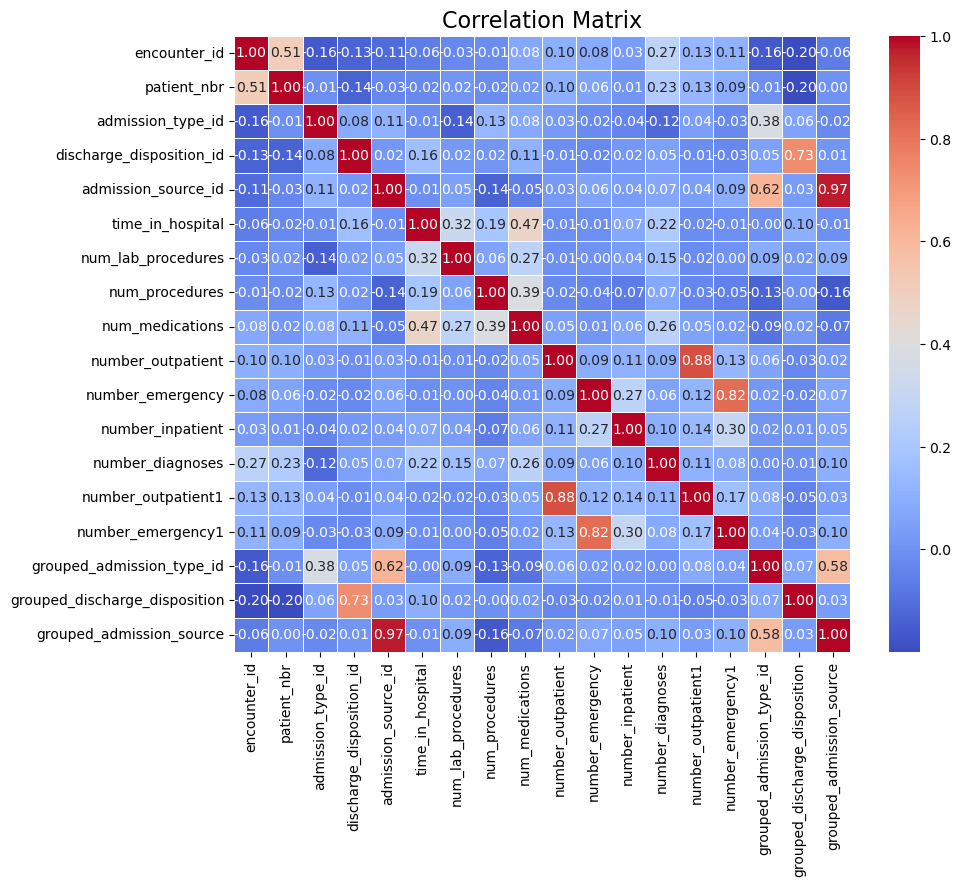

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute the correlation matrix
correlation_matrix = df_cleaned.corr()  # Calculates pairwise correlations for numeric columns

# 2. Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display correlation coefficients in cells
    cmap='coolwarm',       # Color map for visualization (red-blue gradient)
    fmt=".2f",             # Format the correlation values to 2 decimal places
    linewidths=0.5,        # Add lines between cells for better distinction
    square=True            # Makes each cell a square
)

# 3. Add a title to the plot
plt.title('Correlation Matrix', fontsize=16)
plt.show()


### Unique values in each of the features in the dataset

In [27]:
# Print column details: number, name, datatype, and number of unique values
print(f"{'No)':<4} {'Name':<30} {'Datatype':<12} {'Unique Values'}")
print("-" * 60)

for idx, col in enumerate(df_cleaned.columns):
    print(f"{idx+1:<4} {col:<30} {str(df_cleaned[col].dtype):<12} {df_cleaned[col].nunique()}")


No)  Name                           Datatype     Unique Values
------------------------------------------------------------
1    encounter_id                   int64        101766
2    patient_nbr                    int64        71518
3    race                           object       5
4    gender                         object       3
5    age                            object       10
6    admission_type_id              int64        8
7    discharge_disposition_id       int64        26
8    admission_source_id            int64        17
9    time_in_hospital               int64        14
10   num_lab_procedures             int64        118
11   num_procedures                 int64        7
12   num_medications                int64        75
13   number_outpatient              int64        39
14   number_emergency               int64        33
15   number_inpatient               int64        21
16   diag_1                         object       717
17   diag_2                         obj

### Encoding of the necesaary values

In [28]:
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
columns_to_encode = [
    'race', 'gender', 'age2', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 
    'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
    'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed','readmitted'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for each column and store in a new column
for col in columns_to_encode:
    new_col_name = col + "2"  # Append '2' to the column name
    df_cleaned[new_col_name] = label_encoder.fit_transform(df_cleaned[col])

# Verify the new columns
print(df_cleaned[[col + "2" for col in columns_to_encode]].head())


   race2  gender2  age22  max_glu_serum2  A1Cresult2  metformin2  \
0      2        0      0               2           2           1   
1      2        0      0               2           2           1   
2      0        0      0               2           2           1   
3      2        1      0               2           2           1   
4      2        1      1               2           2           1   

   repaglinide2  nateglinide2  chlorpropamide2  glimepiride2  ...  \
0             1             1                1             1  ...   
1             1             1                1             1  ...   
2             1             1                1             1  ...   
3             1             1                1             1  ...   
4             1             1                1             1  ...   

   citoglipton2  insulin2  glyburide-metformin2  glipizide-metformin2  \
0             0         1                     1                     0   
1             0         3     

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 84 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   encounter_id                   101766 non-null  int64  
 1   patient_nbr                    101766 non-null  int64  
 2   race                           101766 non-null  object 
 3   gender                         101766 non-null  object 
 4   age                            101766 non-null  object 
 5   admission_type_id              101766 non-null  int64  
 6   discharge_disposition_id       101766 non-null  int64  
 7   admission_source_id            101766 non-null  int64  
 8   time_in_hospital               101766 non-null  int64  
 9   num_lab_procedures             101766 non-null  int64  
 10  num_procedures                 101766 non-null  int64  
 11  num_medications                101766 non-null  int64  
 12  number_outpatient             

### Making of the new dataframe with necessary columns

In [30]:
# List of columns to keep
selected_columns = ['encounter_id','patient_nbr','race2','gender2','age22','grouped_admission_type_id',
    'grouped_admission_type_id','grouped_admission_source','time_in_hospital',
    'num_procedures', 'num_medications', 'number_outpatient', 
    'number_emergency', 'number_inpatient','number_diagnoses','A1Cresult2', 'insulin2',
    'change2', 'diabetesMed2', 'readmitted2'
]  

# Create a new DataFrame with only the selected columns
new_df = df_cleaned[selected_columns]

# Verify the new DataFrame
print(new_df.head())


   encounter_id  patient_nbr  race2  gender2  age22  \
0       2278392      8222157      2        0      0   
1        149190     55629189      2        0      0   
2         64410     86047875      0        0      0   
3        500364     82442376      2        1      0   
4         16680     42519267      2        1      1   

   grouped_admission_type_id  grouped_admission_type_id  \
0                         20                         20   
1                         10                         10   
2                         10                         10   
3                         10                         10   
4                         10                         10   

   grouped_admission_source  time_in_hospital  num_procedures  \
0                         1                 1               0   
1                         3                 3               0   
2                         3                 2               5   
3                         3                 2         

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   encounter_id               101766 non-null  int64
 1   patient_nbr                101766 non-null  int64
 2   race2                      101766 non-null  int32
 3   gender2                    101766 non-null  int32
 4   age22                      101766 non-null  int32
 5   grouped_admission_type_id  101766 non-null  int64
 6   grouped_admission_type_id  101766 non-null  int64
 7   grouped_admission_source   101766 non-null  int64
 8   time_in_hospital           101766 non-null  int64
 9   num_procedures             101766 non-null  int64
 10  num_medications            101766 non-null  int64
 11  number_outpatient          101766 non-null  int64
 12  number_emergency           101766 non-null  int64
 13  number_inpatient           101766 non-null  int64
 14  numb

### Plotting of Correlation matrix after encoding of the required features

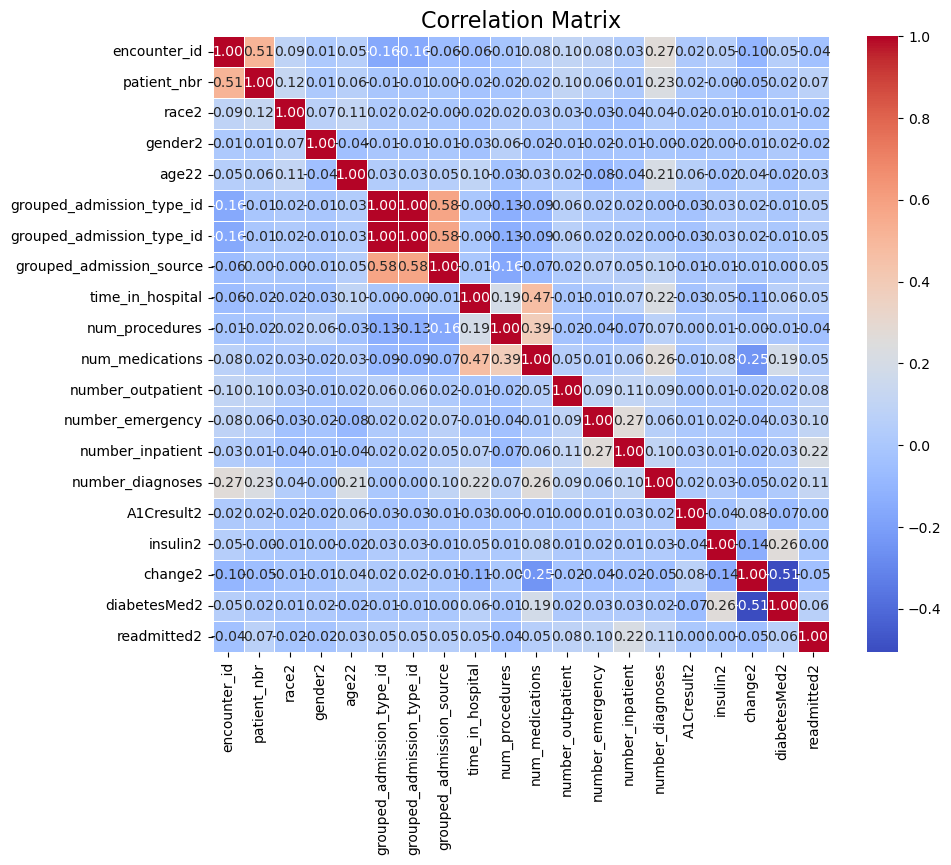

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute the correlation matrix
correlation_matrix = new_df.corr()  # Calculates pairwise correlations for numeric columns

# 2. Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display correlation coefficients in cells
    cmap='coolwarm',       # Color map for visualization (red-blue gradient)
    fmt=".2f",             # Format the correlation values to 2 decimal places
    linewidths=0.5,        # Add lines between cells for better distinction
    square=True            # Makes each cell a square
)

# 3. Add a title to the plot
plt.title('Correlation Matrix', fontsize=16)
plt.show()
